In [1]:
import numpy as np
import matplotlib.pyplot as plt

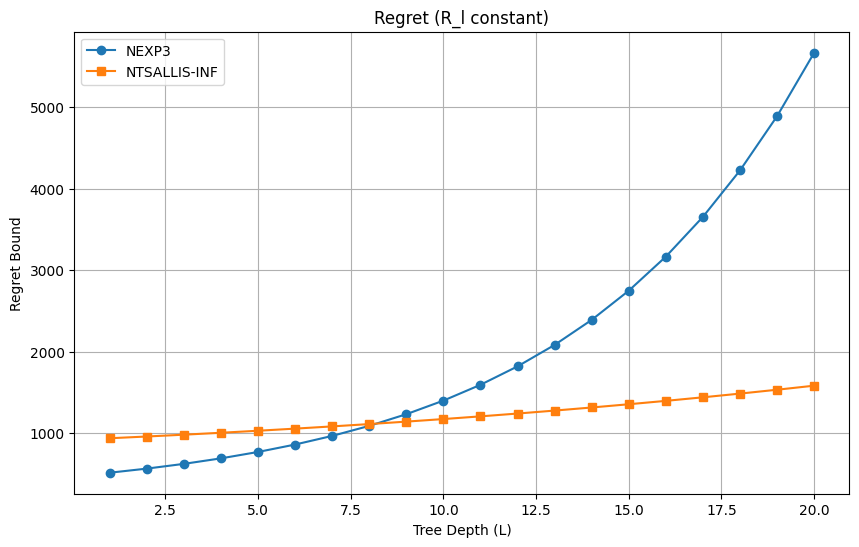

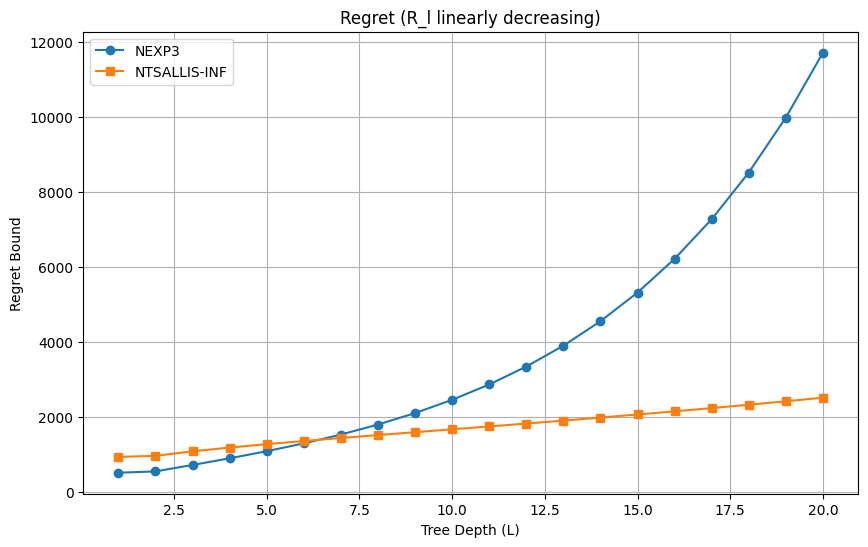

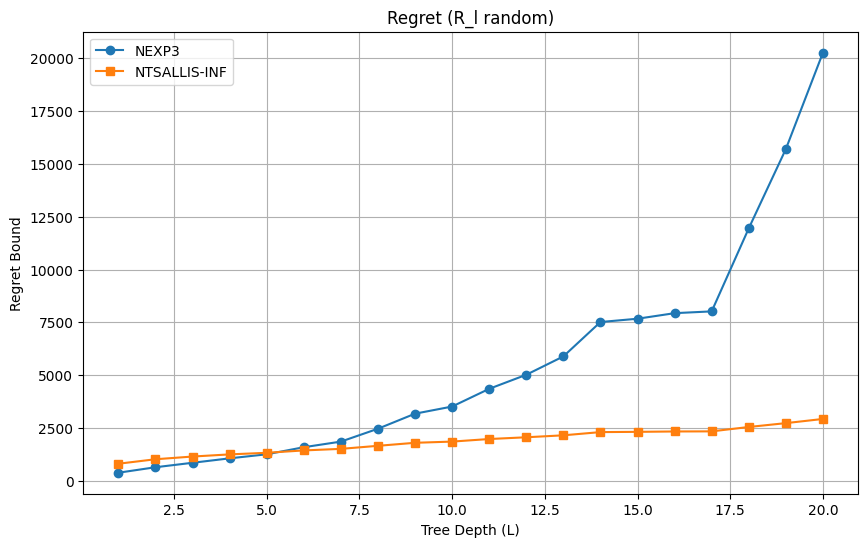

In [3]:
# Problem parameters
T = 10_000  # time horizon
K = 100     # number of actions
L_range = np.arange(1, 21)  # tree depth from 1 to 20

# Define layer sizes: geometric growth
def generate_V_l(L, base=2):
    return np.array([base**l for l in range(1, L + 1)])

# Three types of R_l configurations
def generate_R_l_constant(L):
    return np.ones(L) / L  # normalized so sum is 1

def generate_R_l_linear_decreasing(L):
    return np.linspace(1, 0.1, L)  # decreasing linearly

def generate_R_l_random(L, seed=0):
    np.random.seed(seed)
    return np.random.rand(L)  # random in [0,1]

# Compute regrets for each depth L
def compute_regrets(L_range, R_l_fn, V_l_base=2):
    regret_nexp3 = []
    regret_ntsallis = []
    
    for L in L_range:
        V_l = generate_V_l(L, base=V_l_base)
        R_l = R_l_fn(L)
        
        K_eff_exp = (np.sum(np.sqrt(V_l) * R_l))
        R_nexp3 = 2 * np.sqrt(K_eff_exp * T * np.log(K))
        
        K_eff_tsallis = np.sum(V_l**(1/4) * R_l)
        R_ntsallis = 2 * np.sqrt(2 * T * np.sqrt(K * K_eff_tsallis))
        
        regret_nexp3.append(R_nexp3)
        regret_ntsallis.append(R_ntsallis)
    
    return np.array(regret_nexp3), np.array(regret_ntsallis)

# Compute regrets for 3 different R_l types
regret_const = compute_regrets(L_range, generate_R_l_constant)
regret_linear = compute_regrets(L_range, generate_R_l_linear_decreasing)
regret_random = compute_regrets(L_range, generate_R_l_random)

# Plotting
def plot_regret_comparison(L_range, regret_data, title):
    regret_nexp3, regret_ntsallis = regret_data
    plt.figure(figsize=(10,6))
    plt.plot(L_range, regret_nexp3, label="NEXP3", marker='o')
    plt.plot(L_range, regret_ntsallis, label="NTSALLIS-INF", marker='s')
    plt.xlabel("Tree Depth (L)")
    plt.ylabel("Regret Bound")
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Visualize for each R_l scenario
plot_regret_comparison(L_range, regret_const, "Regret (R_l constant)")
plot_regret_comparison(L_range, regret_linear, "Regret (R_l linearly decreasing)")
plot_regret_comparison(L_range, regret_random, "Regret (R_l random)")
